In [1]:
import os, skimage.io,matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
#This file must be placed within the MNIST dataset to be loaded correctly
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory)
    if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f)
        for f in os.listdir(label_directory)]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

train_data_path = os.path.join(os.getcwd(),"training")
test_data_path = os.path.join(os.getcwd(),"testing")
images, labels = load_data(train_data_path)
test_images,test_labels = load_data(test_data_path)

images = np.asarray(images)
test_images = np.asarray(test_images)
labels = np.asarray(labels)
test_labels = np.asarray(test_labels)

In [3]:
#Splitting the training data into training and validation sets
train_images,validation_images,train_labels,validation_labels = train_test_split(images,
labels, train_size=0.9, test_size=0.1,random_state=0)

In [4]:
#Flattening arrays into one dimension
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0],
num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0],
num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

In [5]:
#Normalizing the image data
train_images = train_images/255
validation_images = validation_images/255
test_images = test_images/255

In [6]:
#Turning the labels into catergories
train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)
num_classes = train_labels.shape[1]

In [7]:
#Building the model
numNodes = 78
model = Sequential()
model.add(Dense(numNodes, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
#Training the model
history = model.fit(train_images, train_labels, validation_data=(validation_images,validation_labels), epochs=10)
training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
training_error = history.history['loss']
validation_error = history.history['val_loss']

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 109us/step - loss: 0.5199 - acc: 0.8185 - val_loss: 0.4244 - val_acc: 0.8460
Epoch 2/10
54000/54000 [==============================] - 5s 95us/step - loss: 0.3946 - acc: 0.8592 - val_loss: 0.4026 - val_acc: 0.8567
Epoch 3/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.3581 - acc: 0.8706 - val_loss: 0.3935 - val_acc: 0.8582
Epoch 4/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.3328 - acc: 0.8786 - val_loss: 0.3616 - val_acc: 0.8727
Epoch 5/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.3141 - acc: 0.8853 - val_loss: 0.3408 - val_acc: 0.8767
Epoch 6/10
54000/54000 [==============================] - 5s 94us/step - loss: 0.2996 - acc: 0.8904 - val_loss: 0.3294 - val_acc: 0.8785
Epoch 7/10
54000/54000 [==============================] - 5s 93us/step - loss: 0.2854 - acc: 0.8958 - val_loss: 0.3536 - val_acc

In [9]:
#Finding the average difference between training and validation accuracy
sumDiff = 0;
for i in range(0, len(training_accuracy)):
    sumDiff += abs(training_accuracy[i] - validation_accuracy[i])

avgDiff = sumDiff / len(training_accuracy)

print ("Avg:", avgDiff * 100)

Avg: 1.5222222222222237


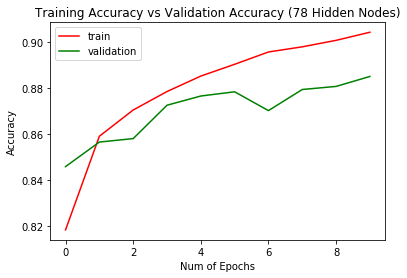

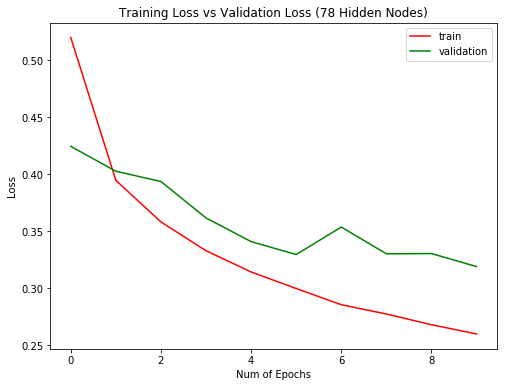

In [10]:
#Plotting accuracy and loss
plt.figure(0)
plt.plot(training_accuracy,'r')
plt.plot(validation_accuracy,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy ("+str(numNodes)+" Hidden Nodes)")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(training_error,'r')
plt.plot(validation_error,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss ("+str(numNodes)+" Hidden Nodes)")
plt.legend(['train','validation'])

plt.show()

In [11]:
#Testing performance on the unseen test data
scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 12.18%
MLP Accuracy on test set: 87.82%


In [12]:
images = images.reshape(images.shape[0], num_pixels).astype('float32')
images = images/255
temp_labels = labels
labels = np_utils.to_categorical(labels)

In [16]:
#Creating the KFold
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_acc = []
cv_error = []

#Iterating through the different folds
for train, test in kfold.split(images, temp_labels):
 #Creating the model
 model = Sequential()
 model.add(Dense(784, input_dim=num_pixels, activation='relu'))
 model.add(Dense(num_classes, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 # Fit the model
 model.fit(images[train], labels[train], epochs=10, verbose=0)
 # evaluate the model
 scores = model.evaluate(images[test], labels[test], verbose=0)
 print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
 cv_acc.append(scores[1] * 100)
 cv_error.append(100-scores[1] * 100)

#Evaluate on the Cross validated sets
print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc),
np.std(cv_acc)))
print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error),
np.std(cv_error)))

#Evaluate on the test set
scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

acc: 89.04%
acc: 88.62%
acc: 88.79%
acc: 88.76%
acc: 88.02%
Cross Validation Accuracy 88.65% (+/- 0.34%)
Cross Validation Error 11.35% (+/- 0.34%)
MLP Error on test set: 12.73%
MLP Accuracy on test set: 87.27%


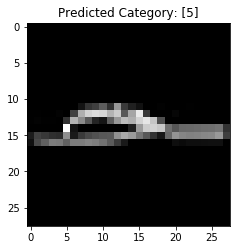

In [14]:
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot

#Testing the model on a random image
import random
image_index = random.randint(0,test_images.shape[0])
random_image = test_images[image_index]
random_label = model.predict(random_image.reshape(1,random_image.shape[0])).argmax(axis=-1)

#Plot the tested image and its predicted catergory
plt.subplot(121)
plt.imshow(random_image.reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title("Predicted Category: "+str(random_label))
plt.show()

In [15]:
#Visualizing the model, doesn't work properly because of the size of the network
#from ann_visualizer.visualize import ann_viz;
#ann_viz(model, title="78 Hidden Nodes")

In [17]:
#Evaluating each model on the test data
numNodes = [78, 254, 431, 608, 784]
i = 0
while i < 5:
    print(numNodes[i])
    model = Sequential()
    model.add(Dense(numNodes[i], input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    #Training the model
    history = model.fit(train_images, train_labels, validation_data=(validation_images,validation_labels), epochs=10)
    training_accuracy = history.history['acc']
    validation_accuracy = history.history['val_acc']
    training_error = history.history['loss']
    validation_error = history.history['val_loss']

    #Evaluate on the test set
    scores = model.evaluate(test_images, test_labels, verbose=0)
    print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
    print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))
    i = i + 1

78
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 186us/step - loss: 0.5214 - acc: 0.8194 - val_loss: 0.4328 - val_acc: 0.8420
Epoch 2/10
54000/54000 [==============================] - 6s 114us/step - loss: 0.3882 - acc: 0.8604 - val_loss: 0.3686 - val_acc: 0.8647
Epoch 3/10
54000/54000 [==============================] - 6s 111us/step - loss: 0.3510 - acc: 0.8746 - val_loss: 0.3786 - val_acc: 0.8633
Epoch 4/10
54000/54000 [==============================] - 6s 111us/step - loss: 0.3289 - acc: 0.8808 - val_loss: 0.3389 - val_acc: 0.8722
Epoch 5/10
54000/54000 [==============================] - 6s 110us/step - loss: 0.3100 - acc: 0.8879 - val_loss: 0.3376 - val_acc: 0.8793
Epoch 6/10
54000/54000 [==============================] - 6s 109us/step - loss: 0.2957 - acc: 0.8920 - val_loss: 0.3315 - val_acc: 0.8798
Epoch 7/10
54000/54000 [==============================] - 6s 110us/step - loss: 0.2813 - acc: 0.8976 - val_loss: 0.3289